# Linear Regression: Numerical Preprocessing

![modeling](https://media.giphy.com/media/srPaLAtDTsKuk/giphy.gif)

Today, we will work through a linear regression problem involving baby carseats. 

![carseat](img/baby_seat.jpeg)

The lesson has two notebooks. 

- The first notebook involves numeric feature preprocessing.  
- The second notebook involves categorical preprocessing and two types of feature engineering: interaction terms and polynomial terms.

The carseat dataset is a toy dataset, but we can easily imagine this business scenario.  A company selling babyseats wants to be able to determine the factors dictating the price of a carseat based on the following factors. 

- Sales: unit sales at each location
- CompPrice: price charged by nearest competitor at each location
- Income: community income level
- Advertising: local advertising budget for company at each location
- Population: population size in region (in thousands)
- Price: price charged for car seat at each site
- Age: average age of the local population
- Education: education level at each location
- ShelveLoc: quality of shelving location at site (Good | Bad | Medium)
- Urban: whether the store is in an urban or rural location
- USA: whether the store is in the US or not

## Identify the target

One of the first steps of a linear regression project is to identify the target variable.  We need to identify a **continuous** target variable.  

> What is the target in the carseat scenario?

In [17]:
# assign the target variable to a variable y and features to variable X

# plot a histogram of the target variable and interpret the results

> Based on the features above, speculate as to what 3 will be the most important drivers of sales price.

## Numerical Preprocessing


We will start by preprocessing the numerical data, train a simple model on it, and see how it performs.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Our data lives in a csv within the data folder
df = pd.read_csv('data/Carseats.csv')

In [11]:
# Let's look at the datatypes of our dataset
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [12]:
# We can also see dtypes with the info method, 
# which also shows us if we have any na values
# luckily, we don't have any na's in this data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [13]:
# We can also use describe() to get an overview of the data structures
# Which columns are left out? Why?
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [19]:
# Use the dataframe method to select non-object datatypes
X_numeric = X.select_dtypes(exclude='object')

In [15]:
# how many columns were dropped?
X.shape[1] - X_numeric.shape[1] 

3

In [125]:
# A very useful initial exploratory tool is sns.pairplot.
# Let's use it on the numerical data here.
# sns.pairplot(X_numeric)

> - Which assumption of linear regression can we use the pairplot to check?
> - Does our data violate any of the assumptions?
> - If so, take a moment to address that issue.

In [126]:
# code here

## Scaling 

Let's look at a boxplot of our features.  Boxplots will help us see outliers. 

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

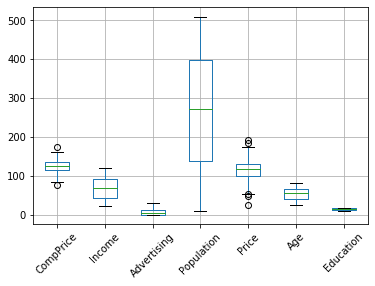

In [127]:
X_numeric.boxplot()
plt.xticks(rotation=45)

- We can see that we have outliers across several features
-  Scaling our features will be important for many reasons. For now, it will make our boxplot look nicer. - Some different scaler options are Standard Scaler, min/max scaler, mean normalization.  
- Checkout this [blog post](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization) for insight about different applications of standard scaler vs min-max scaling.
- No matter which scaler you choose, use the same scaler across the entire dataset.

In [20]:
# In this case, we will use the Standard Scaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
column_names = X_numeric.columns
X_numeric = pd.DataFrame(ss.fit_transform(X_numeric))
X_numeric.columns = column_names

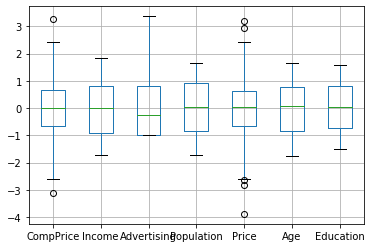

In [21]:
X_numeric.boxplot()

In [130]:
# Let's fit a model and compare its performance before
# and after removing outliers

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_numeric, y)
lr.score(X_numeric, y)

0.5220972482417174

In [132]:
# What is this score?  

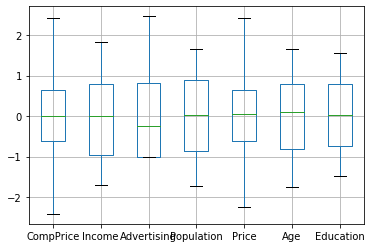

In [22]:
# Now let's deal with those outliers
import scipy.stats as stats
X_numeric = X_numeric[(np.abs(X_numeric) < 2.5).all(axis=1)]
X_numeric.boxplot()

In [23]:
y = y.iloc[X_numeric.index]


In [26]:
# in this case, removing outliers made our R_2 go down
lr.fit(X_numeric, y)
lr.score(X_numeric, y)

0.5220972482417174

In [27]:
# We can now look at our coeficients
list(zip(lr.coef_, X_numeric.columns))

[(1.4448244711125413, 'CompPrice'),
 (0.3335912783303459, 'Income'),
 (0.8591006168853017, 'Advertising'),
 (-0.03267193507714237, 'Population'),
 (-2.1326153070126534, 'Price'),
 (-0.733746395342117, 'Age'),
 (-0.13334314364452593, 'Education')]

In [28]:
# Let's interpret these coefficients


In [29]:
import statsmodels.formula.api as smf
formula = 'Sales ~ ' + '+'.join(X_numeric.columns)
formula

'Sales ~ CompPrice+Income+Advertising+Population+Price+Age+Education'

In [30]:
data = X_numeric.join(y)
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,9.50
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,11.22
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,10.06
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,7.40
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,4.15


In [31]:
mod = smf.ols(formula=formula, data = data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     59.15
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           5.21e-57
Time:                        06:50:38   Log-Likelihood:                -798.98
No. Observations:                 387   AIC:                             1614.
Df Residuals:                     379   BIC:                             1646.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4873      0.098     76.377      0.000       7.295       7.680
CompPrice       1.4448      0.124     11.673      0.000       1.201       1.688
Income          0.3336      0.098      3.398      0.001       0.141       0.527
Advertising     0.8591      0.106      8.137      0.000       0.652       1.067
Population     -0.0327      0.103     -0.318      0.751      -0.235       0.169
Price          -2.1326      0.127    -16.846      0.000      -2.382      -1.884
Age            -0.7337      0.099     -7.413      0.000      -0.928      -0.539
Education      -0.1333      0.098     -1.359      0.175      -0.326       0.060
==============================================================================
Omnibus:                        7.900   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.189
Skew:                           0.275   Prob(JB):                       0.0275
Kurtosis:                       2.620   Cond. No.                         1.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""